In [36]:
# Imports
from utils import *
import numpy as np
import scipy as sp

In [37]:
# Import data
lin_data = load_dataset("datasets/linear_function_data.txt", sort=True)
nonlin_data =  load_dataset("datasets/nonlinear_function_data.txt", sort=True)

# Task 1.1) Linear Least Squares on linear data

Execution time of our: 0.0010254383087158203
Coefficients: [[7.50000229e-01]
 [2.64347195e-07]]


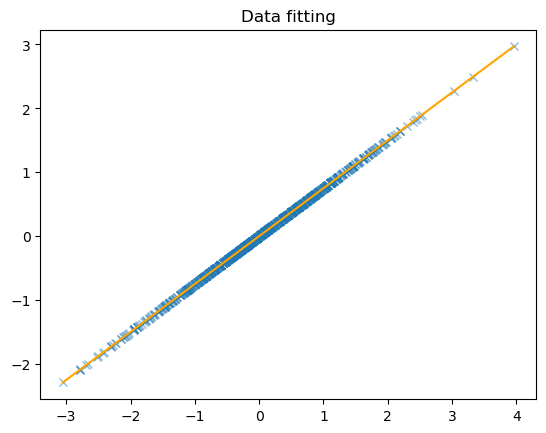

Execution time of lib: 0.0
Coefficients: [[7.50000229e-01]
 [2.64347195e-07]]


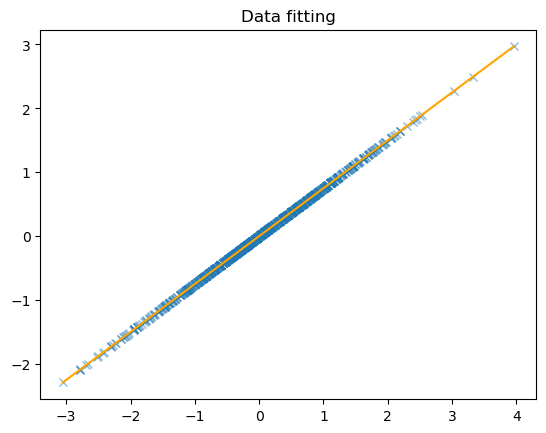

In [38]:
# Least-Squares
x, y, x2, y2, c_mat = linear_lstsq(data=lin_data, bias=True, direct=True, exec_t=True)
print(f'Coefficients: {c_mat}')  # Print transformation matrix
plot_comparison(x, y, x2, y2, line=True)  # Plot graph

# Least-Squares using library function
x, y, x2, y2, c_mat = linear_lstsq(data=lin_data, bias=True, direct=False, exec_t=True)
print(f'Coefficients: {c_mat}')  # Print transformation matrix
plot_comparison(x, y, x2, y2, line=True)  # Plot graph

# Task 1.1) RBF on linear data

Coefficients: [[ -1104050.74150792]
 [ -8387654.6325135 ]
 [ 41710699.50850812]
 [-38889995.61333392]
 [-25336202.65148049]]


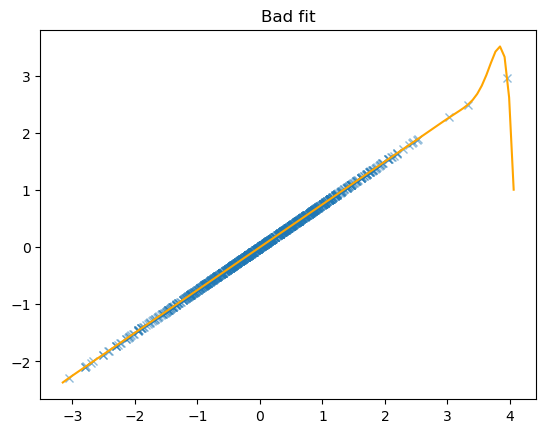

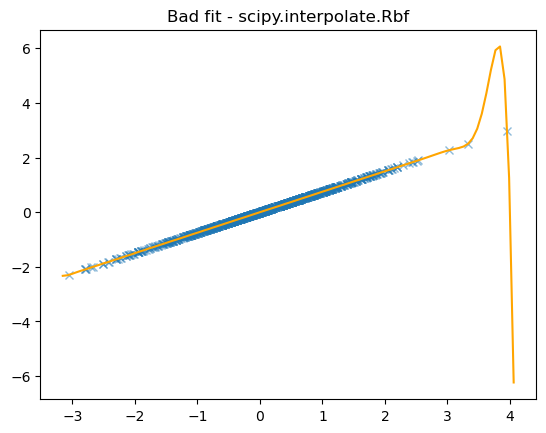

Coefficients: [[-2.29610175]
 [ 2.9689541 ]]


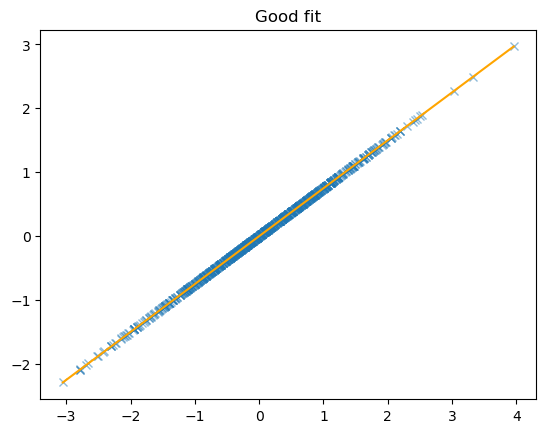

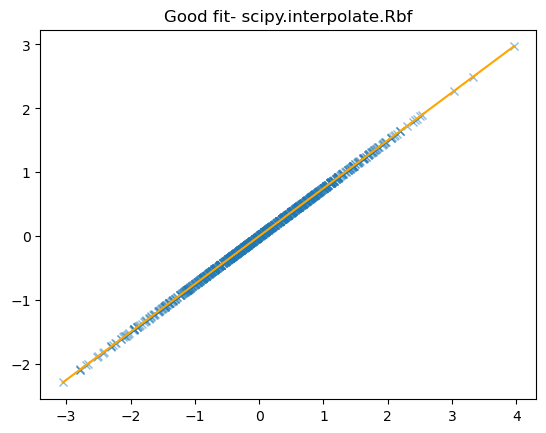

In [39]:
# RBF implementation - Bad fit
x, y, x2, y2, c_mat = rbf_lstsq(lin_data, L=100, epsilon=1.2, sq=True, domain=0.1, lib=False)
print(f'Coefficients: {c_mat[:5]}')  # Print first 5 values
plot_comparison(x, y, x2, y2, line=True, title='Bad fit')  # Plot graph
# RBF using Library function - Bad fit
x, y, x2, y2, c_mat = rbf_lstsq(lin_data, L=100, epsilon=1.2, sq=True, domain=0.1, lib=True)
plot_comparison(x, y, x2, y2, line=True, title='Bad fit - scipy.interpolate.Rbf')  # Plot graph

# RBF implementation - Good fit
x, y, x2, y2, c_mat = rbf_lstsq(lin_data, L=2, epsilon=0.1, sq=True,  lib=False)
print(f'Coefficients: {c_mat[:5]}')  # Print transformation matrix
plot_comparison(x, y, x2, y2, line=True, title='Good fit')  # Plot graph
# RBF using Library function - Good fit
x, y, x2, y2, c_mat = rbf_lstsq(lin_data, L=2, epsilon=1, sq=True, lib=True)
plot_comparison(x, y, x2, y2, line=True, title='Good fit- scipy.interpolate.Rbf')  # Plot graph

# Task 1.2)

Coefficients: [[0.02873498]
 [0.11114247]]


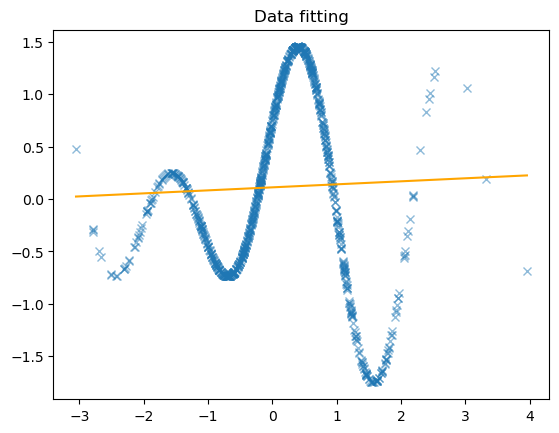

In [40]:
# Least-Squares
x, y, x2, y2, c_mat = linear_lstsq(data=nonlin_data, bias=True)
print(f'Coefficients: {c_mat}')  # Print transformation matrix
plot_comparison(x, y, x2, y2, line=True)  # Plot graph

Extra: Trying to approximate nonlinear data by adding polynomials

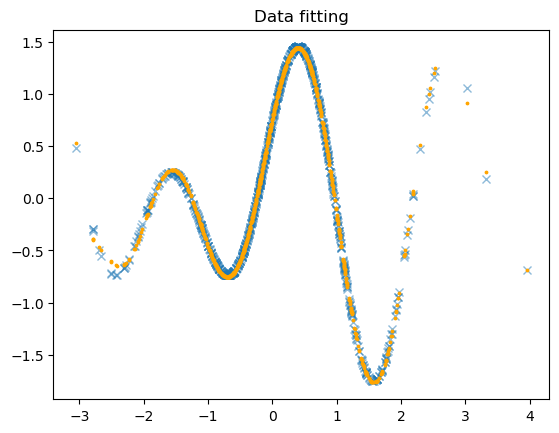

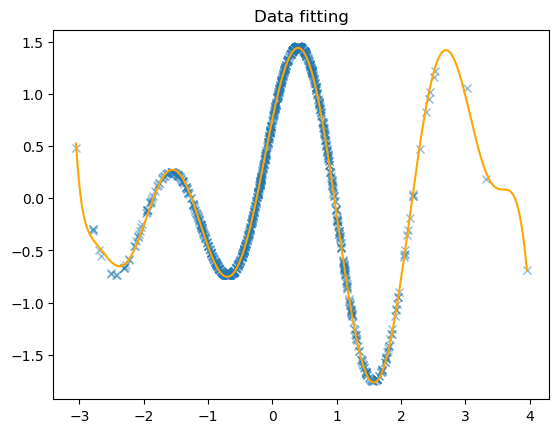

In [41]:
# List of functions
degree = 13
lambdas = [lambda v, bound_x = i+1: np.power(v, bound_x) for i in range(degree-1)]
lambdas.append(lambda v: np.power(v, 0))

x, y, x2, y2, c_mat = linear_lstsq(data=nonlin_data, bias=True, lambdas=lambdas, lin=False)
plot_comparison(x, y, x2, y2, line=False)  # Plot graph
# Plot of 
x, y, x2, y2, c_mat = linear_lstsq(data=nonlin_data, bias=True, lambdas=lambdas, lin=True)
plot_comparison(x, y, x2, y2, line=True)  # Plot graph

# Task 1.3)

Coefficients: [[    52568.0155742 ]
 [  5751478.7979184 ]
 [-17010486.53751735]
 [  4746142.3627159 ]
 [ 21171113.34788486]]


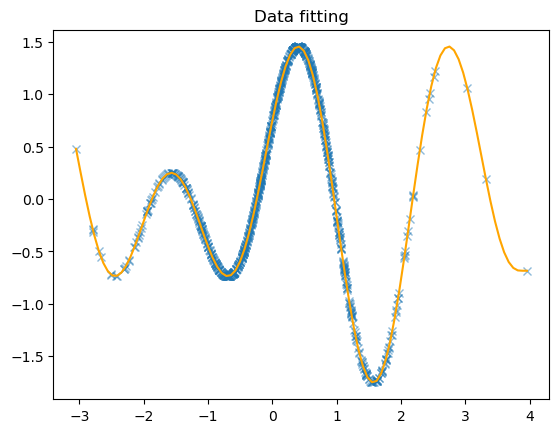

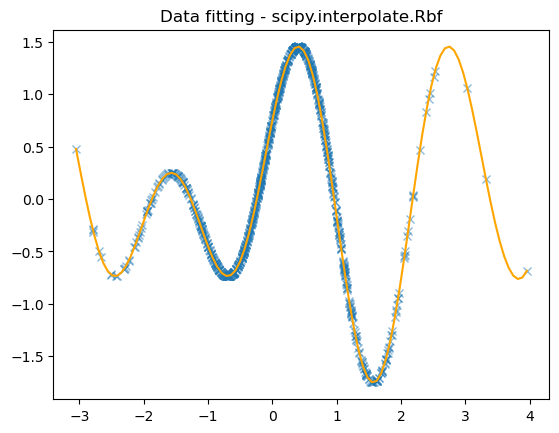

In [42]:
# RBF implementation
x, y, x2, y2, c_mat = rbf_lstsq(nonlin_data, L=100, epsilon=1.4, sq=True, lib=False)
print(f'Coefficients: {c_mat[:5]}')  # Print first 5 values
plot_comparison(x, y, x2, y2, line=True)  # Plot graph

# RBF using Library function
x, y, x2, y2, c_mat = rbf_lstsq(nonlin_data, L=100, epsilon=1.8, sq=True, lib=True)
plot_comparison(x, y, x2, y2, line=True, title='Data fitting - scipy.interpolate.Rbf')  # Plot graph